**Importing Libraries**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

**Setting Plot Style**

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_context('notebook', font_scale=1.2)

**Loading Data**

In [3]:
df = pd.read_csv("/content/Data_sets_loop_1 - Copy.csv", header=None, skiprows=2)

**Defining Column Names**

In [4]:
column_names = [
    'Permittivity', 'Height of Sub', 'Loss_tangent', 'Slot_X', 'Slot_Y', 'Slot_Z',
    'Slot_width', 'Slot_length', 'Antenna_X', 'Antenna_Y', 'Antenna_Z',
    'Antenna_length', 'Antenna_Width', 'Micrositip_X', 'Micrositip_Y',
    'Micrositip_Z', 'ML_length', 'ML_Width', 'Number of Loop', 'Loop1_X',
    'Loop1_Y', 'Loop1_Z', 'L1_OuterDia', 'L1_InnerDia', 'Loop2_X', 'Loop2_Y',
    'Loop2_Z', 'L2_OuterDia', 'L2_InnerDia', 'Loop3_X', 'Loop3_Y', 'Loop3_Z',
    'L3_OuterDia', 'L3_InnerDia', 'Loop4_X', 'Loop4_Y', 'Loop4_Z',
    'L4_OuterDia', 'L4_InnerDia', 'Frequency', 'RL depth', 'Bandwidth (%)',
    'Radiation Efficiency (%)', 'Total Efficiency (%)', 'Gain', 'F/B ratio'
]

**Assigning Column Names to DataFrame**

In [5]:
df = df.iloc[:, :46]
df.columns = column_names

**Checking Dataset Size**

In [6]:
print(f"Total rows in dataset: {len(df)}")

Total rows in dataset: 400


**Handling Missing Values-1**

In [7]:
df = df.replace(['', 'NaN', 'nan', 'NA', 'N/A', 'null', 'NULL'], np.nan)

**Handling Missing Values-2**

In [8]:
df = df.replace([np.inf, -np.inf], np.nan)

**Checking for Missing Values**

In [9]:
print("NaN counts in feature columns before cleaning:\n", df.iloc[:, :39].isna().sum())
print("NaN counts in target columns before cleaning:\n", df.iloc[:, 39:].isna().sum())

NaN counts in feature columns before cleaning:
 Permittivity      200
Height of Sub     200
Loss_tangent      200
Slot_X            200
Slot_Y            200
Slot_Z            200
Slot_width        200
Slot_length       200
Antenna_X         200
Antenna_Y         200
Antenna_Z         200
Antenna_length    200
Antenna_Width     200
Micrositip_X        0
Micrositip_Y        0
Micrositip_Z        0
ML_length           0
ML_Width            0
Number of Loop      0
Loop1_X             0
Loop1_Y             0
Loop1_Z             0
L1_OuterDia         0
L1_InnerDia         0
Loop2_X             0
Loop2_Y             0
Loop2_Z             0
L2_OuterDia         0
L2_InnerDia         0
Loop3_X             0
Loop3_Y             0
Loop3_Z             0
L3_OuterDia       208
L3_InnerDia       208
Loop4_X            79
Loop4_Y            79
Loop4_Z            79
L4_OuterDia       208
L4_InnerDia       208
dtype: int64
NaN counts in target columns before cleaning:
 Frequency                   209
RL

**Dropping Rows with Missing Values**

In [10]:
df_clean = df.dropna()
print(f"Rows after dropping NaNs: {len(df_clean)}")

Rows after dropping NaNs: 191


**Defining Features and Targets**

In [11]:
X = df_clean.iloc[:, :39]  # Features: first 39 columns
y = df_clean.iloc[:, 39:]

**Handling Outliers in Target Variables**

In [12]:
for col in y.columns:
    lower, upper = y[col].quantile([0.01, 0.99])
    y[col] = y[col].clip(lower=lower, upper=upper)

**Splitting Data into Train, Validation, and Test Sets**

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**Hyperparameter Tuning**

In [14]:
n_estimators_list = [50, 100, 200]
max_depth_list = [None, 10, 20]
best_r2 = -np.inf
best_params = {}

In [15]:
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf.fit(X_train, y_train)
        y_pred_val = rf.predict(X_val)
        r2 = r2_score(y_val, y_pred_val, multioutput='uniform_average')
        if r2 > best_r2:
            best_r2 = r2
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

**Training the Final Model**

In [16]:
rf_final = RandomForestRegressor(**best_params, random_state=42)
rf_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

**Making Predictions on Test Set**

In [17]:
y_pred_test = rf_final.predict(X_test)

**Evaluating Model Performance**

In [18]:
mse_per_target = mean_squared_error(y_test, y_pred_test, multioutput='raw_values')
r2_per_target = r2_score(y_test, y_pred_test, multioutput='raw_values')
average_mse = np.mean(mse_per_target)
average_r2 = np.mean(r2_per_target)

In [19]:
target_names = y.columns
for i, target in enumerate(target_names):
    print(f'Target: {target}')
    print(f'MSE: {mse_per_target[i]:.4f}')
    print(f'R-squared: {r2_per_target[i]:.4f}\n')

print(f'Overall Average MSE: {average_mse:.4f}')
print(f'Overall Average R-squared: {average_r2:.4f}')

Target: Frequency
MSE: 0.0535
R-squared: -0.1129

Target: RL depth
MSE: 24.1632
R-squared: -0.3069

Target: Bandwidth (%)
MSE: 4.3614
R-squared: -0.3218

Target: Radiation Efficiency (%)
MSE: 222275.1868
R-squared: -47.6518

Target: Total Efficiency (%)
MSE: 17940.3024
R-squared: -8.1934

Target: Gain
MSE: 0.1194
R-squared: -1.9448

Target: F/B ratio
MSE: 12.1687
R-squared: -0.3303

Overall Average MSE: 34322.3365
Overall Average R-squared: -8.4088


**Accuracy**

In [25]:
y_true_class = np.round(y_test.values)
y_pred_class = np.round(y_pred_test)

accuracies = []
for i in range(y_test.shape[1]):
    acc = accuracy_score(y_true_class[:, i], y_pred_class[:, i])
    accuracies.append(acc)

average_accuracy = np.mean(accuracies)

In [26]:
print("Accuracy per target:")
for i, target in enumerate(y_test.columns):
    print(f"{target}: {accuracies[i]:.4f}")

print(f"\nOverall Average Accuracy: {average_accuracy:.4f}")

Accuracy per target:
Frequency: 0.7241
RL depth: 0.1034
Bandwidth (%): 0.3448
Radiation Efficiency (%): 0.0000
Total Efficiency (%): 0.0000
Gain: 0.6207
F/B ratio: 0.1724

Overall Average Accuracy: 0.2808


**Feature Importance Visualization**

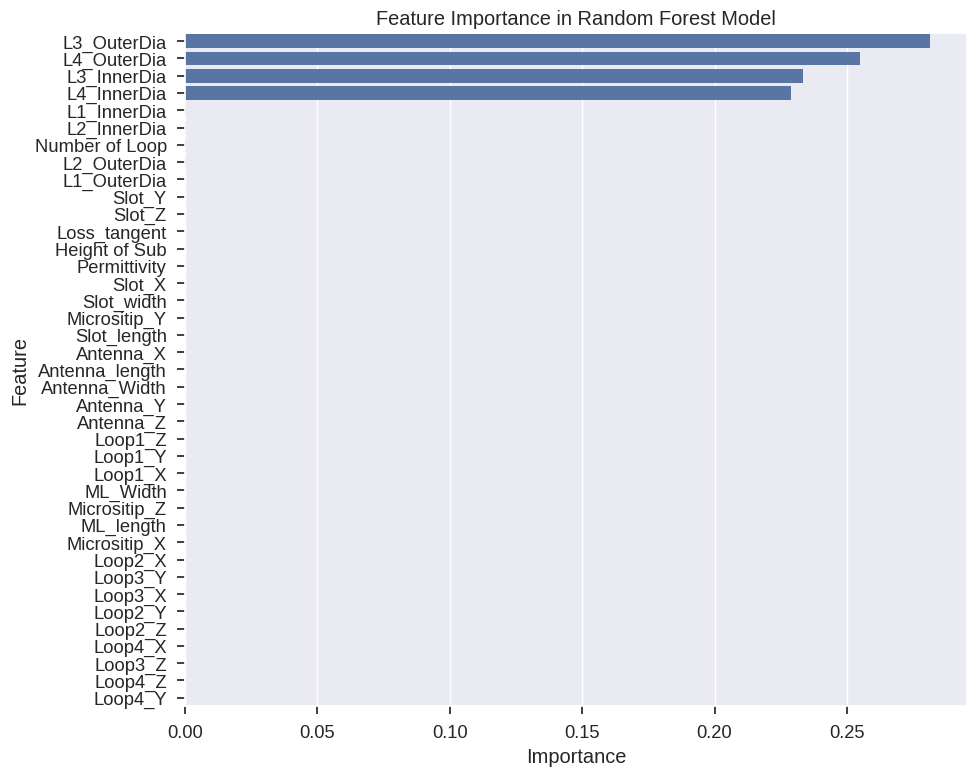

In [20]:
plt.figure(figsize=(10, 8))
importances = rf_final.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Actual vs. Predicted Values Plot**

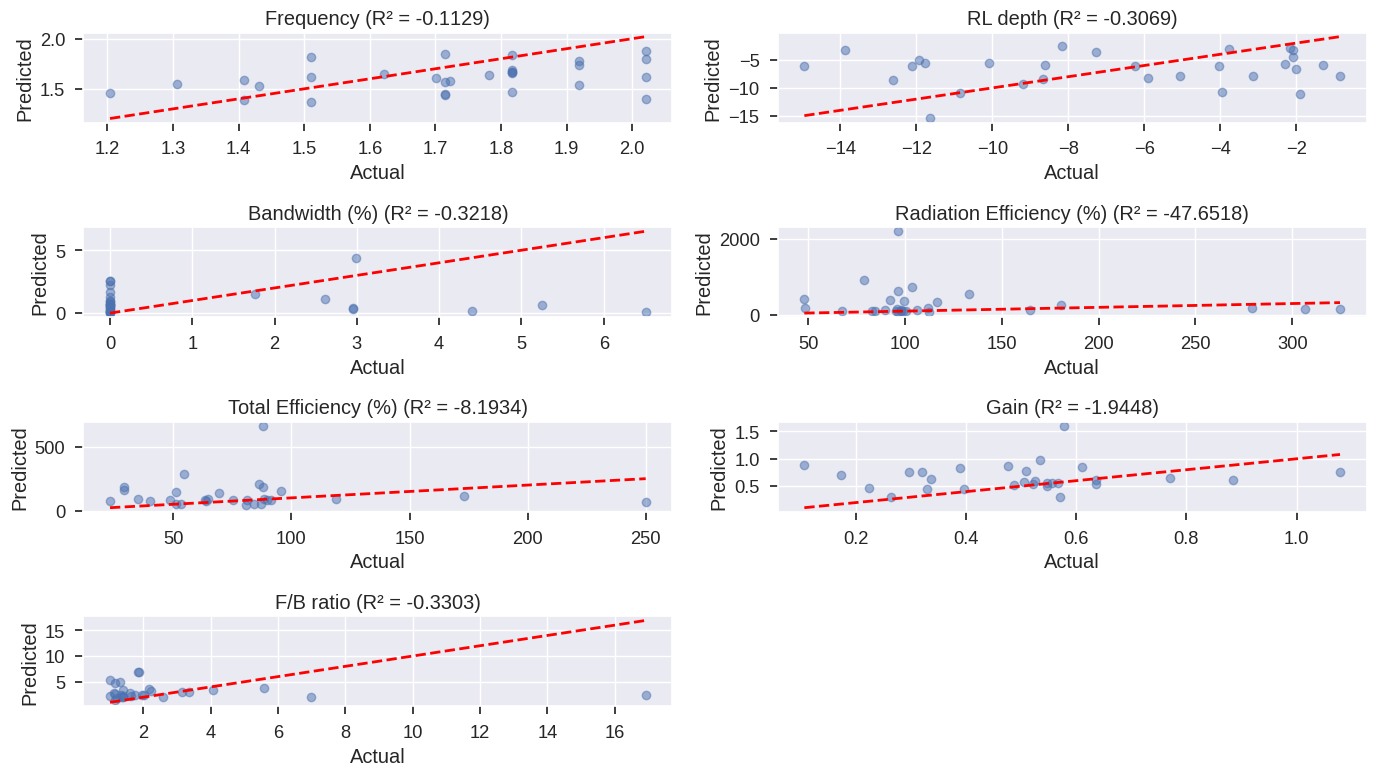

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(14,8))
axes = axes.flatten()
for i, target in enumerate(target_names):
    ax = axes[i]
    ax.scatter(y_test[target], y_pred_test[:, i], alpha=0.5)
    ax.plot([y_test[target].min(), y_test[target].max()],
            [y_test[target].min(), y_test[target].max()], 'r--', lw=2)
    ax.set_title(f'{target} (R² = {r2_per_target[i]:.4f})')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.grid(True)
if len(target_names) < len(axes):
    for j in range(len(target_names), len(axes)):
        fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

**Error Distribution Plot**

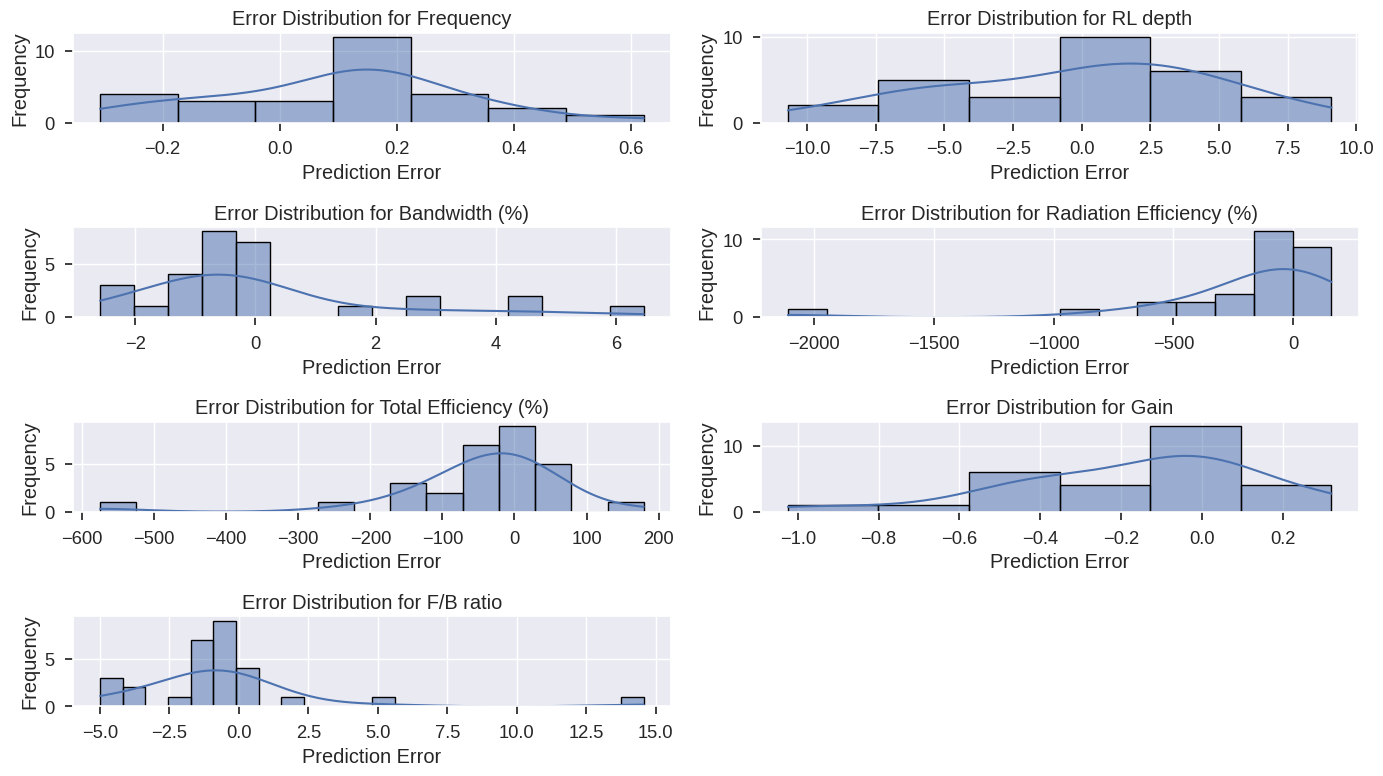

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(14, 8))
axes = axes.flatten()
for i, target in enumerate(target_names):
    ax = axes[i]
    errors = y_test[target] - y_pred_test[:, i]
    sns.histplot(errors, kde=True, ax=ax)
    ax.set_title(f'Error Distribution for {target}')
    ax.set_xlabel('Prediction Error')
    ax.set_ylabel('Frequency')
    ax.grid(True)
if len(target_names) < len(axes):
    for j in range(len(target_names), len(axes)):
        fig.delaxes(axes[j])
plt.tight_layout()
plt.show()